In [1]:
import face_recognition
import matplotlib.pyplot as plt
import cv2
import cvzone
import numpy as np
import imutils

In [2]:
file = "./gravacao.mp4"
cap = cv2.VideoCapture(file)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [3]:
print(height, width, frames)

640 352 772


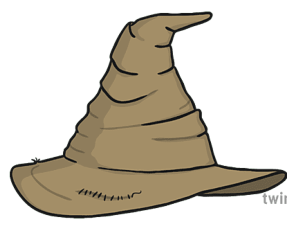

In [4]:
overlay = cv2.imread("./filtro.png", cv2.IMREAD_UNCHANGED)
overlay = cv2.cvtColor(overlay, cv2.COLOR_BGRA2RGBA)
overlay = overlay[:, 110:515, :]
plt.imshow(overlay)
plt.axis("off")
plt.show()

In [ ]:
frame_list = []
stop = False
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #print("image shape", frame.shape)
    
    face_locations = face_recognition.face_locations(frame)
    #print("face_locations", face_locations)
    
    if face_locations:
        for face in face_locations:
            coords = face
            
            #O overlay depende do tamanho da zona marcada pelo reconhecimento facial
            overlay_resized = imutils.resize(overlay, width=int(1.5*(coords[1]-coords[3])))        

            rows_over, cols_over = overlay_resized.shape[:2]
            
            #Marcação do local do overlay, depende do local marcado pelo reconhecimento facial
            overlay_place = [int(coords[3] * 0.7), int((coords[0] - rows_over) * 0.85)]
            #print(overlay_place)
            
            #Se o filtro passar da imagem, a parte que passou, é recortada
            if overlay_place[1] < 0:
                overlay_resized = overlay_resized[abs(overlay_place[1]):, :, :]
                overlay_place[1] = 0
            if overlay_place[0] < 0:
                overlay_resized = overlay_resized[:, abs(overlay_place[0]):, :, :]
                overlay_place[0] = 0
                stop = True
            if overlay_place[0] + cols_over > width:
                overlay_resized = overlay_resized[:, :width-overlay_place[0]+cols_over, :]
                overlay_place[0] = width - cols_over
                stop = True

            frame = cvzone.overlayPNG(frame, overlay_resized, overlay_place)
            

            ### PARA VISUALIZAR O VIDEO EM TEMPO REAL ###
            #cv2.imshow("video", frame)
            #############################################

            ### PARA VISUALIZAR O FRAME A FRAME ###
            #plt.imshow(frame)
            #plt.axis("off")
            #plt.show()
            #######################################